## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765


0:	learn: 0.9793830	total: 47.6ms	remaining: 47.5s
1:	learn: 0.9582303	total: 48.5ms	remaining: 24.2s
2:	learn: 0.9353695	total: 49.4ms	remaining: 16.4s
3:	learn: 0.9161608	total: 50.2ms	remaining: 12.5s
4:	learn: 0.8990488	total: 51.1ms	remaining: 10.2s
5:	learn: 0.8832373	total: 52ms	remaining: 8.61s
6:	learn: 0.8650817	total: 52.9ms	remaining: 7.5s
7:	learn: 0.8477194	total: 53.7ms	remaining: 6.66s
8:	learn: 0.8311338	total: 54.5ms	remaining: 6s
9:	learn: 0.8132347	total: 55.4ms	remaining: 5.48s
10:	learn: 0.7953546	total: 56.2ms	remaining: 5.05s
11:	learn: 0.7796915	total: 57ms	remaining: 4.69s
12:	learn: 0.7641617	total: 57.9ms	remaining: 4.39s
13:	learn: 0.7484061	total: 58.8ms	remaining: 4.14s
14:	learn: 0.7353909	total: 59.7ms	remaining: 3.92s
15:	learn: 0.7199546	total: 60.5ms	remaining: 3.72s
16:	learn: 0.7058790	total: 61.4ms	remaining: 3.55s
17:	learn: 0.6928959	total: 62.2ms	remaining: 3.39s
18:	learn: 0.6802797	total: 63ms	remaining: 3.25s
19:	learn: 0.6666222	total: 63.9

117:	learn: 0.2762157	total: 147ms	remaining: 1.1s
118:	learn: 0.2751476	total: 148ms	remaining: 1.09s
119:	learn: 0.2742685	total: 148ms	remaining: 1.09s
120:	learn: 0.2732505	total: 149ms	remaining: 1.08s
121:	learn: 0.2722779	total: 150ms	remaining: 1.08s
122:	learn: 0.2706818	total: 151ms	remaining: 1.08s
123:	learn: 0.2699505	total: 152ms	remaining: 1.07s
124:	learn: 0.2691699	total: 153ms	remaining: 1.07s
125:	learn: 0.2678759	total: 154ms	remaining: 1.06s
126:	learn: 0.2667829	total: 154ms	remaining: 1.06s
127:	learn: 0.2658124	total: 155ms	remaining: 1.06s
128:	learn: 0.2648855	total: 156ms	remaining: 1.05s
129:	learn: 0.2641466	total: 157ms	remaining: 1.05s
130:	learn: 0.2633410	total: 158ms	remaining: 1.05s
131:	learn: 0.2621334	total: 159ms	remaining: 1.04s
132:	learn: 0.2614823	total: 160ms	remaining: 1.04s
133:	learn: 0.2601560	total: 160ms	remaining: 1.04s
134:	learn: 0.2595334	total: 161ms	remaining: 1.03s
135:	learn: 0.2587113	total: 162ms	remaining: 1.03s
136:	learn: 0

160:	learn: 0.2396371	total: 184ms	remaining: 960ms
161:	learn: 0.2390494	total: 185ms	remaining: 957ms
162:	learn: 0.2387350	total: 186ms	remaining: 955ms
163:	learn: 0.2379292	total: 187ms	remaining: 952ms
164:	learn: 0.2372001	total: 188ms	remaining: 950ms
165:	learn: 0.2366878	total: 188ms	remaining: 947ms
166:	learn: 0.2363036	total: 189ms	remaining: 944ms
167:	learn: 0.2355500	total: 190ms	remaining: 941ms
168:	learn: 0.2349215	total: 191ms	remaining: 938ms
169:	learn: 0.2341849	total: 192ms	remaining: 936ms
170:	learn: 0.2335247	total: 192ms	remaining: 933ms
171:	learn: 0.2330065	total: 193ms	remaining: 931ms
172:	learn: 0.2326195	total: 194ms	remaining: 928ms
173:	learn: 0.2319223	total: 195ms	remaining: 926ms
174:	learn: 0.2313989	total: 196ms	remaining: 923ms
175:	learn: 0.2306230	total: 197ms	remaining: 921ms
176:	learn: 0.2299509	total: 197ms	remaining: 918ms
177:	learn: 0.2293964	total: 198ms	remaining: 916ms
178:	learn: 0.2288240	total: 199ms	remaining: 913ms
179:	learn: 

277:	learn: 0.1810632	total: 282ms	remaining: 732ms
278:	learn: 0.1808467	total: 283ms	remaining: 731ms
279:	learn: 0.1804819	total: 284ms	remaining: 730ms
280:	learn: 0.1800651	total: 285ms	remaining: 728ms
281:	learn: 0.1796570	total: 285ms	remaining: 727ms
282:	learn: 0.1792465	total: 286ms	remaining: 725ms
283:	learn: 0.1789390	total: 287ms	remaining: 724ms
284:	learn: 0.1785633	total: 288ms	remaining: 723ms
285:	learn: 0.1781925	total: 289ms	remaining: 721ms
286:	learn: 0.1777819	total: 290ms	remaining: 720ms
287:	learn: 0.1773282	total: 291ms	remaining: 719ms
288:	learn: 0.1769502	total: 292ms	remaining: 717ms
289:	learn: 0.1766256	total: 292ms	remaining: 716ms
290:	learn: 0.1762818	total: 293ms	remaining: 714ms
291:	learn: 0.1759812	total: 294ms	remaining: 713ms
292:	learn: 0.1756654	total: 295ms	remaining: 712ms
293:	learn: 0.1753518	total: 296ms	remaining: 711ms
294:	learn: 0.1750510	total: 297ms	remaining: 709ms
295:	learn: 0.1746660	total: 298ms	remaining: 708ms
296:	learn: 

322:	learn: 0.1655860	total: 320ms	remaining: 671ms
323:	learn: 0.1651200	total: 321ms	remaining: 671ms
324:	learn: 0.1647142	total: 322ms	remaining: 670ms
325:	learn: 0.1645623	total: 323ms	remaining: 668ms
326:	learn: 0.1642024	total: 324ms	remaining: 667ms
327:	learn: 0.1638373	total: 325ms	remaining: 666ms
328:	learn: 0.1635890	total: 326ms	remaining: 664ms
329:	learn: 0.1632923	total: 327ms	remaining: 663ms
330:	learn: 0.1629712	total: 327ms	remaining: 662ms
331:	learn: 0.1624494	total: 328ms	remaining: 660ms
332:	learn: 0.1620981	total: 329ms	remaining: 660ms
333:	learn: 0.1618328	total: 330ms	remaining: 658ms
334:	learn: 0.1614792	total: 331ms	remaining: 657ms
335:	learn: 0.1611670	total: 332ms	remaining: 656ms
336:	learn: 0.1607130	total: 333ms	remaining: 654ms
337:	learn: 0.1604204	total: 333ms	remaining: 653ms
338:	learn: 0.1601258	total: 334ms	remaining: 652ms
339:	learn: 0.1598547	total: 335ms	remaining: 651ms
340:	learn: 0.1595338	total: 336ms	remaining: 650ms
341:	learn: 

439:	learn: 0.1359071	total: 421ms	remaining: 535ms
440:	learn: 0.1356568	total: 422ms	remaining: 534ms
441:	learn: 0.1353241	total: 422ms	remaining: 533ms
442:	learn: 0.1351545	total: 423ms	remaining: 532ms
443:	learn: 0.1349249	total: 424ms	remaining: 531ms
444:	learn: 0.1346373	total: 425ms	remaining: 530ms
445:	learn: 0.1343300	total: 426ms	remaining: 529ms
446:	learn: 0.1339775	total: 427ms	remaining: 528ms
447:	learn: 0.1336963	total: 427ms	remaining: 527ms
448:	learn: 0.1334275	total: 428ms	remaining: 526ms
449:	learn: 0.1332987	total: 429ms	remaining: 524ms
450:	learn: 0.1331067	total: 430ms	remaining: 523ms
451:	learn: 0.1328279	total: 431ms	remaining: 522ms
452:	learn: 0.1325780	total: 432ms	remaining: 521ms
453:	learn: 0.1323446	total: 432ms	remaining: 520ms
454:	learn: 0.1320852	total: 433ms	remaining: 519ms
455:	learn: 0.1318339	total: 434ms	remaining: 518ms
456:	learn: 0.1315433	total: 435ms	remaining: 517ms
457:	learn: 0.1313653	total: 436ms	remaining: 516ms
458:	learn: 

483:	learn: 0.1259611	total: 459ms	remaining: 489ms
484:	learn: 0.1257490	total: 460ms	remaining: 488ms
485:	learn: 0.1255953	total: 460ms	remaining: 487ms
486:	learn: 0.1254128	total: 461ms	remaining: 486ms
487:	learn: 0.1253223	total: 462ms	remaining: 485ms
488:	learn: 0.1251908	total: 463ms	remaining: 484ms
489:	learn: 0.1251006	total: 464ms	remaining: 483ms
490:	learn: 0.1250088	total: 465ms	remaining: 482ms
491:	learn: 0.1247732	total: 466ms	remaining: 481ms
492:	learn: 0.1245630	total: 466ms	remaining: 480ms
493:	learn: 0.1243378	total: 467ms	remaining: 479ms
494:	learn: 0.1240792	total: 468ms	remaining: 477ms
495:	learn: 0.1238442	total: 469ms	remaining: 476ms
496:	learn: 0.1235879	total: 470ms	remaining: 475ms
497:	learn: 0.1234208	total: 470ms	remaining: 474ms
498:	learn: 0.1231217	total: 471ms	remaining: 473ms
499:	learn: 0.1229870	total: 472ms	remaining: 472ms
500:	learn: 0.1227567	total: 473ms	remaining: 471ms
501:	learn: 0.1226643	total: 474ms	remaining: 470ms
502:	learn: 

597:	learn: 0.1070094	total: 556ms	remaining: 374ms
598:	learn: 0.1068378	total: 558ms	remaining: 374ms
599:	learn: 0.1067240	total: 559ms	remaining: 373ms
600:	learn: 0.1066308	total: 560ms	remaining: 372ms
601:	learn: 0.1064834	total: 561ms	remaining: 371ms
602:	learn: 0.1063183	total: 562ms	remaining: 370ms
603:	learn: 0.1061908	total: 563ms	remaining: 369ms
604:	learn: 0.1060025	total: 563ms	remaining: 368ms
605:	learn: 0.1058657	total: 564ms	remaining: 367ms
606:	learn: 0.1057348	total: 565ms	remaining: 366ms
607:	learn: 0.1056360	total: 566ms	remaining: 365ms
608:	learn: 0.1054397	total: 567ms	remaining: 364ms
609:	learn: 0.1052296	total: 568ms	remaining: 363ms
610:	learn: 0.1050978	total: 569ms	remaining: 362ms
611:	learn: 0.1049759	total: 569ms	remaining: 361ms
612:	learn: 0.1047950	total: 570ms	remaining: 360ms
613:	learn: 0.1046790	total: 571ms	remaining: 359ms
614:	learn: 0.1045934	total: 572ms	remaining: 358ms
615:	learn: 0.1045011	total: 573ms	remaining: 357ms
616:	learn: 

638:	learn: 0.1007188	total: 593ms	remaining: 335ms
639:	learn: 0.1005967	total: 594ms	remaining: 334ms
640:	learn: 0.1003681	total: 595ms	remaining: 333ms
641:	learn: 0.1001886	total: 596ms	remaining: 332ms
642:	learn: 0.1001231	total: 597ms	remaining: 331ms
643:	learn: 0.0999201	total: 598ms	remaining: 330ms
644:	learn: 0.0997243	total: 599ms	remaining: 329ms
645:	learn: 0.0996245	total: 600ms	remaining: 329ms
646:	learn: 0.0995261	total: 601ms	remaining: 328ms
647:	learn: 0.0993747	total: 601ms	remaining: 327ms
648:	learn: 0.0992698	total: 602ms	remaining: 326ms
649:	learn: 0.0991658	total: 603ms	remaining: 325ms
650:	learn: 0.0990463	total: 604ms	remaining: 324ms
651:	learn: 0.0989367	total: 605ms	remaining: 323ms
652:	learn: 0.0988354	total: 606ms	remaining: 322ms
653:	learn: 0.0986840	total: 607ms	remaining: 321ms
654:	learn: 0.0985309	total: 608ms	remaining: 320ms
655:	learn: 0.0984249	total: 608ms	remaining: 319ms
656:	learn: 0.0982410	total: 609ms	remaining: 318ms
657:	learn: 

752:	learn: 0.0855645	total: 692ms	remaining: 227ms
753:	learn: 0.0854675	total: 693ms	remaining: 226ms
754:	learn: 0.0854359	total: 694ms	remaining: 225ms
755:	learn: 0.0853455	total: 695ms	remaining: 224ms
756:	learn: 0.0852547	total: 695ms	remaining: 223ms
757:	learn: 0.0851671	total: 696ms	remaining: 222ms
758:	learn: 0.0850702	total: 697ms	remaining: 221ms
759:	learn: 0.0849800	total: 698ms	remaining: 220ms
760:	learn: 0.0848933	total: 699ms	remaining: 219ms
761:	learn: 0.0846586	total: 700ms	remaining: 219ms
762:	learn: 0.0845349	total: 700ms	remaining: 218ms
763:	learn: 0.0844346	total: 701ms	remaining: 217ms
764:	learn: 0.0843622	total: 702ms	remaining: 216ms
765:	learn: 0.0842870	total: 703ms	remaining: 215ms
766:	learn: 0.0841950	total: 704ms	remaining: 214ms
767:	learn: 0.0841282	total: 705ms	remaining: 213ms
768:	learn: 0.0840619	total: 706ms	remaining: 212ms
769:	learn: 0.0839081	total: 707ms	remaining: 211ms
770:	learn: 0.0837202	total: 707ms	remaining: 210ms
771:	learn: 

793:	learn: 0.0814621	total: 727ms	remaining: 189ms
794:	learn: 0.0813325	total: 728ms	remaining: 188ms
795:	learn: 0.0812950	total: 729ms	remaining: 187ms
796:	learn: 0.0812315	total: 729ms	remaining: 186ms
797:	learn: 0.0810291	total: 730ms	remaining: 185ms
798:	learn: 0.0809826	total: 731ms	remaining: 184ms
799:	learn: 0.0808953	total: 732ms	remaining: 183ms
800:	learn: 0.0808623	total: 733ms	remaining: 182ms
801:	learn: 0.0808489	total: 734ms	remaining: 181ms
802:	learn: 0.0807639	total: 734ms	remaining: 180ms
803:	learn: 0.0806450	total: 735ms	remaining: 179ms
804:	learn: 0.0805655	total: 736ms	remaining: 178ms
805:	learn: 0.0804313	total: 737ms	remaining: 177ms
806:	learn: 0.0802978	total: 738ms	remaining: 176ms
807:	learn: 0.0802387	total: 738ms	remaining: 175ms
808:	learn: 0.0801072	total: 739ms	remaining: 175ms
809:	learn: 0.0799547	total: 740ms	remaining: 174ms
810:	learn: 0.0798502	total: 741ms	remaining: 173ms
811:	learn: 0.0798206	total: 742ms	remaining: 172ms
812:	learn: 

910:	learn: 0.0706051	total: 825ms	remaining: 80.6ms
911:	learn: 0.0704923	total: 826ms	remaining: 79.7ms
912:	learn: 0.0704330	total: 826ms	remaining: 78.8ms
913:	learn: 0.0703179	total: 827ms	remaining: 77.8ms
914:	learn: 0.0702500	total: 828ms	remaining: 76.9ms
915:	learn: 0.0702212	total: 829ms	remaining: 76ms
916:	learn: 0.0700883	total: 830ms	remaining: 75.1ms
917:	learn: 0.0699883	total: 830ms	remaining: 74.2ms
918:	learn: 0.0699332	total: 831ms	remaining: 73.3ms
919:	learn: 0.0698475	total: 832ms	remaining: 72.4ms
920:	learn: 0.0697426	total: 833ms	remaining: 71.5ms
921:	learn: 0.0696181	total: 834ms	remaining: 70.5ms
922:	learn: 0.0694964	total: 835ms	remaining: 69.6ms
923:	learn: 0.0694349	total: 835ms	remaining: 68.7ms
924:	learn: 0.0693576	total: 836ms	remaining: 67.8ms
925:	learn: 0.0692736	total: 837ms	remaining: 66.9ms
926:	learn: 0.0692230	total: 838ms	remaining: 66ms
927:	learn: 0.0690717	total: 839ms	remaining: 65.1ms
928:	learn: 0.0689558	total: 840ms	remaining: 64.2

952:	learn: 0.0667001	total: 859ms	remaining: 42.4ms
953:	learn: 0.0665747	total: 861ms	remaining: 41.5ms
954:	learn: 0.0665482	total: 861ms	remaining: 40.6ms
955:	learn: 0.0664565	total: 862ms	remaining: 39.7ms
956:	learn: 0.0663957	total: 863ms	remaining: 38.8ms
957:	learn: 0.0662733	total: 864ms	remaining: 37.9ms
958:	learn: 0.0661413	total: 865ms	remaining: 37ms
959:	learn: 0.0660855	total: 866ms	remaining: 36.1ms
960:	learn: 0.0659838	total: 866ms	remaining: 35.2ms
961:	learn: 0.0659437	total: 867ms	remaining: 34.3ms
962:	learn: 0.0658268	total: 868ms	remaining: 33.3ms
963:	learn: 0.0657279	total: 869ms	remaining: 32.4ms
964:	learn: 0.0656477	total: 870ms	remaining: 31.5ms
965:	learn: 0.0655809	total: 870ms	remaining: 30.6ms
966:	learn: 0.0655116	total: 871ms	remaining: 29.7ms
967:	learn: 0.0654445	total: 872ms	remaining: 28.8ms
968:	learn: 0.0653442	total: 873ms	remaining: 27.9ms
969:	learn: 0.0652869	total: 874ms	remaining: 27ms
970:	learn: 0.0652557	total: 875ms	remaining: 26.1

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

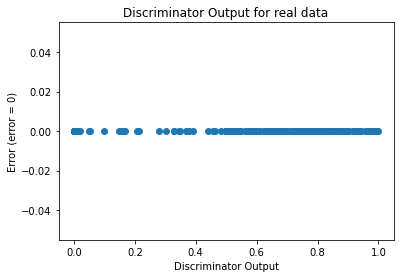

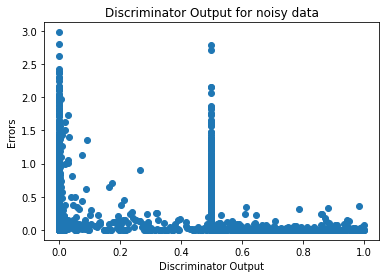

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

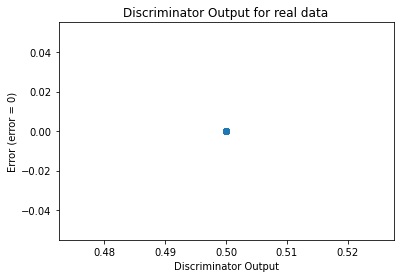

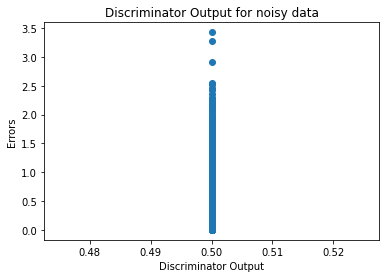

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0514]], device='cuda:0', requires_grad=True)
